<a href="https://colab.research.google.com/github/mehdihoor/calnew/blob/master/hisoiran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


اطلاعات مربوط به تراز تجاری ایران از سال 1900 تا 1939 برگرفته از سایت [ریکاردو](http://ricardo.medialab.sciences-po.fr/#!/about) گرفته شده است. این سایت به گفته دست اندرکارانش در صفحه درباره ما، دیتابیسی کامل است از تجارت در جهان که از سال 1870 آنسوتر نمی‌رود و داده‌های تجارت جهانی در اواخر قرن 19 تا نیمه قرن بیستم را در خود ذخیره دارد. آنچه در زیر دیده می شود ابتدا مربوط به سال های 1900 (اولین سالی که در سایت واجد داده های مربوط به این است) تا 1914 تقریبا زمانی که رضاخان به آرامی در صحنه سیاست ایران سر و کله‌اش پیدا می‌شود را در بر می‌گیرد. 
---


In [59]:
#@title
import glob                         # this module helps in selecting files 
import pandas as pd                 # this module helps in processing CSV files
import xml.etree.ElementTree as ET  # this module helps in processing XML files.
from datetime import datetime
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/merge.csv", error_bad_lines=False)
import glob                         # this module helps in selecting files 
import pandas as pd                 # this module helps in processing CSV files
import xml.etree.ElementTree as ET  # this module helps in processing XML files.
from datetime import datetime
import matplotlib.pyplot as plt
import os
import locale

import arabic_reshaper
from bidi.algorithm import get_display
os.environ["PYTHONIOENCODING"] = "utf-8"
tmpfile    = "temp.tmp"               # file used to store all extracted data
logfile    = "logfile.txt"            # all event logs will be stored in this file
targetfile = "transformed_data.csv"   # file where transformed data is stored
def extract_from_csv(file_to_process):
    dataframe = pd.read_csv(file_to_process)
    return dataframe

def extract():
    extracted_data = pd.DataFrame(columns=["reporting","partner","partner type","year","import","export","total","currency","source"]) # create an empty data frame to hold extracted data
    for csvfile in glob.glob("*.csv"):
        extracted_data = extracted_data.append(extract_from_csv(csvfile), ignore_index=True)
    return extracted_data
def transform(data):
        #Convert height which is in inches to millimeter
        #Convert the datatype of the column into float
        data.impor = data.impor.astype(float)
        #Convert inches to meters and round off to two decimals(one inch is 0.0254 meters)
        data['import'] = round(data.impor / 10000,2)
        
        #Convert weight which is in pounds to kilograms
        #Convert the datatype of the column into float
        data.export = data.export.astype(float)
        #Convert pounds to kilograms and round off to two decimals(one pound is 0.45359237 kilograms)
        data['export'] = round(data.export / 10000,2)
        return data
def load(targetfile,data_to_load):
    data_to_load.to_csv(targetfile)
def log(message):
    timestamp_format = '%Y-%h-%d-%H:%M:%S' # Year-Monthname-Day-Hour-Minute-Second
    now = datetime.now() # get current timestamp
    timestamp = now.strftime(timestamp_format)
    with open("logfile.txt","a") as f:
        f.write(timestamp + ',' + message + '\n')
log("ETL Job Started")
log("Extract phase Started")
extracted_data = extract()
log("Extract phase Ended")
def handle_arabic(input_string):
    reshaped_text = arabic_reshaper.reshape(input_string)
    return get_display(reshaped_text)







b'Skipping line 15: expected 9 fields, saw 17\nSkipping line 77: expected 9 fields, saw 17\nSkipping line 135: expected 9 fields, saw 17\nSkipping line 191: expected 9 fields, saw 17\nSkipping line 209: expected 9 fields, saw 17\nSkipping line 218: expected 9 fields, saw 17\nSkipping line 246: expected 9 fields, saw 17\nSkipping line 268: expected 9 fields, saw 17\nSkipping line 296: expected 9 fields, saw 17\nSkipping line 312: expected 9 fields, saw 17\nSkipping line 328: expected 9 fields, saw 17\nSkipping line 373: expected 9 fields, saw 17\nSkipping line 447: expected 9 fields, saw 17\nSkipping line 509: expected 9 fields, saw 17\nSkipping line 527: expected 9 fields, saw 17\n'


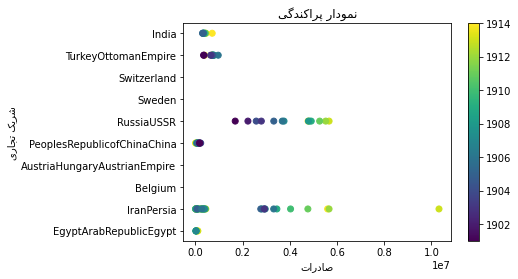

In [60]:
#@title
plt.scatter(a['export'], a['partner'].astype(str),c=a['year'])
 
# Adding Title to the Plot
plt.title(handle_arabic("نمودار پراکندگی"))
 
# Setting the X and Y labels

plt.xlabel(handle_arabic('صادرات'))
plt.ylabel(handle_arabic('شریک تجاری'))
plt.colorbar()
plt.show()


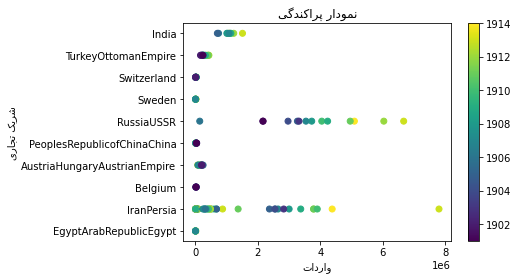

In [64]:
#@title
plt.scatter(a['import'], a['partner'].astype(str),c=a['year'])
 
# Adding Title to the Plot
plt.title(handle_arabic("نمودار پراکندگی"))
 
# Setting the X and Y labels

plt.xlabel(handle_arabic('واردات'))
plt.ylabel(handle_arabic('شریک تجاری'))
plt.colorbar()
plt.show()

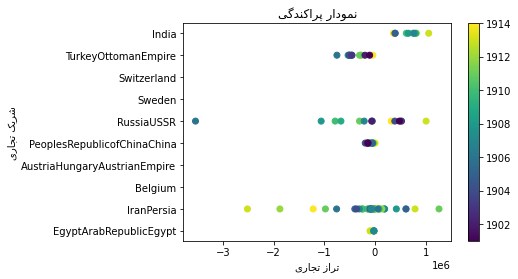

In [65]:
#@title
plt.scatter(a['import']-a['export'], a['partner'].astype(str),c=a['year'])
 
# Adding Title to the Plot
plt.title(handle_arabic("نمودار پراکندگی"))
 
# Setting the X and Y labels

plt.xlabel(handle_arabic('تراز تجاری'))
plt.ylabel(handle_arabic('شریک تجاری'))
plt.colorbar()
plt.show()

In [66]:
#@title
import ipywidgets as widgets

slider = widgets.IntSlider(20, min=0, max=100)
slider
import plotly.graph_objects as px

plot = px.Figure(data=[px.Scatter(x=data['export'],
    y=data['partner'],
    mode='markers',)
])
plot.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "scatter"],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=["type", "bar"],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
            direction="down",
        ),
    ]
)
 
plot.show()

In [67]:
#@title
import plotly.graph_objects as px
import plotly.express as px
import ipywidgets as widgets

slider = widgets.IntSlider(20, min=0, max=100)

b=data[data.partner != 'IranPersia']
fig = px.line(b, x='year',y='import', color='partner')
 
# showing the plot
fig.show()
slider

IntSlider(value=20)

In [68]:
#@title
c=data[data.partner != 'IranPersia']
fig = px.line(c, x='year',y='import', color='partner')
 
# showing the plot
fig.show()

In [ ]:
#@title
fig = px.bar(c, x='year',y='export', color='partner')
 
# showing the plot
fig.show()

In [ ]:
#@title
c=data[data.partner != 'IranPersia']
fig = px.bar(c, x='year',y='import', color='partner')
 
# showing the plot
fig.show()

In [ ]:
#@title
c=data[data.partner != 'IranPersia']
d=c['export']-c['import']
fig = px.bar(c, x='year',y=d, color='partner')
 
# showing the plot
fig.show()

In [ ]:
#@title
c=data[data.partner != 'IranPersia']
d=c['export']-c['import']
fig = px.histogram(c, x='year',y=d, color='partner')
 
# showing the plot
fig.show()

In [ ]:
#@title
c=data[data.partner != 'IranPersia']
fig = px.histogram(c, x='year',y='total', color='partner')
 
# showing the plot
fig.show()

In [46]:
#@title

c=data[data.partner != 'IranPersia']
fig = px.histogram(c, x='year',y='total', color='partner')
 
# showing the plot
fig.show()


In [47]:
import IPython
from google.colab import output

def Concat(a, b):
  # Use display.JSON to transfer a structured result.
  return IPython.display.JSON({'result': ' '.join((a, b))})

output.register_callback('notebook.Concat', Concat)